# Quantum circuits, strings and Parametrisation (Example 5 Modified)
## By: Agm Islam, Maisha Binte Rashid



# Definitions

1. **String diagrama** is a diagrammatic representation that reflects computations in a monoidal category, an abstraction well-suited to model the way a quantum computer works and processes data. String diagrams are the native form of representing sentences in lambeq and DisCoCat, since they remain close to quantum circuits, yet are independent of any low-level design decisions depending on hardware. They can be seen as enriched tensor networks.

2. **Quantum circuit** is a sequence of quantum gates, measurements, and initializations of qubits that expresses a computation in a quantum computer. The purpose of lambeq is to convert sentences into quantum circuits that can be evaluated on quantum hardware.

3. **Tensor network** is a directed acyclic graph expressing a (multi-)linear computation between tensors. The vertices of the graph are multi-linear tensor maps, and the edges correspond to vector spaces. Tensor networks have found many applications in quantum mechanics. lambeq’s string diagrams can be seen as tensor networks with additional properties.

4. **ansatz (plural: ansätze)** is a map that determines choices such as the number of qubits that every wire of a string diagram is associated with and the concrete parameterised quantum states that correspond to each word. For the classical case, an ansatz determines the number of dimensions associated with each type, and the way that large tensors are represented as matrix product states.

5. **Combinatory Categorial Grammar (CCG)** is a grammar formalism inspired by combinatory logic and developed by Mark Steedman [[3]](#references). It defines a number of combinators (application, composition, and type-raising being the most common) that operate on syntactically-typed lexical items, by means of natural deduction style proofs. CCG is categorised as a mildly context-sensitive grammar, standing in between context-free and context-sensitive in Chomsky hierarchy and providing a nice trade-off between expressive power and computational complexity.

6. **IQP circuit** means instantaneous Quantum Polynomial. A circuit which interleaves layers of Hadamard quantum gates with diagonal unitaries.

7. **DisCoPy** means DIStributional COmpositional PYthon. A Python library for working with monoidal categories.

8. **pytket** is a Python interface for the tket compiler.

9. **tket** this stylised $t\ket{\text{ket}}$. A quantum software development platform produced by Cambridge Quantum. The heart of tket is a language-agnostic optimising compiler designed to generate code for a variety of NISQ devices, which has several features designed to minimise the influence of device error.



1. Packages

In [1]:
from lambeq import BobcatParser

C:\Users\LENOVO\.conda\envs\QNLP\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### First, we change the size of the sentence from 4 to 6

In [17]:
sentence = 'Quantam Computing is an interesting topic'

In [19]:
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)

In [20]:
from lambeq import AtomicType, IQPAnsatz

In [21]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE

#### Second, we change the number of layers from 2 to 3. We also change the number number of qubits that every wire of a string diagram is associated with to 3

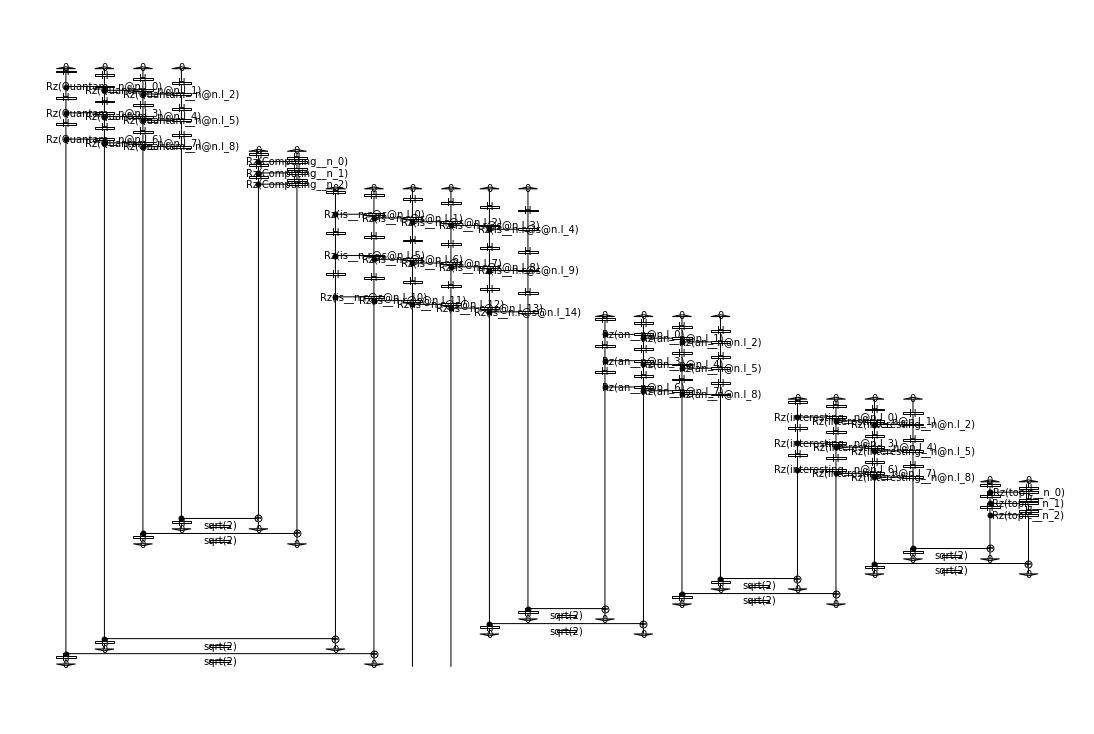

In [32]:
ansatz = IQPAnsatz({N: 2, S: 2}, n_layers=3)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

#### We observe that there is an increase in the number of R_z rotations 

In [33]:
from pytket.circuit.display import render_circuit_jupyter

In [34]:
tket_circuit = discopy_circuit.to_tk()
render_circuit_jupyter(tket_circuit)

#### We find that there are now 22 qubits and 20 control bits

In [13]:
from pytket.extensions.qiskit import tk_to_qiskit
qiskit_circuit = tk_to_qiskit(tket_circuit)
qiskit_circuit.draw()

┌───┐                                           »
q_0: ──────────┤ H ├──────────────────────────■────────────────»
               ├───┤             ┌────────────┴─────────────┐  »
q_1: ──────────┤ H ├─────────────┤ Rz(2*π*Quantam__n@n.l_0) ├──»
     ┌─────────┴───┴──────────┐  └┬────────────────────────┬┘  »
q_2: ┤ Rx(2*π*Computing__n_0) ├───┤ Rz(2*π*Computing__n_1) ├───»
     └─────────┬───┬──────────┘   └────────────────────────┘   »
q_3: ──────────┤ H ├──────────────────────────■────────────────»
               ├───┤            ┌─────────────┴─────────────┐  »
q_4: ──────────┤ H ├────────────┤ Rz(2*π*is__n.r@s@s.l@n_0) ├──»
               ├───┤            └───────────────────────────┘  »
q_5: ──────────┤ H ├───────────────────────────────────────────»
               ├───┤                                           »
q_6: ──────────┤ H ├───────────────────────────────────────────»
               ├───┤                                           »
q_7: ──────────┤ H ├──────────────────────────■────────────────»
               ├───┤           ┌──────────────┴───────────────┐»
q_8: ──────────┤ H ├───────────┤ Rz(2*π*interesting__n.r@s_0) ├»
               └───┘           └──────────────────────────────┘»
c: 8/══════════════════════════════════════════════════════════»
                                                               »
«                 ┌───┐                                            »
«q_0: ────────────┤ H ├───────────────────────────■────────────────»
«                 ├───┤              ┌────────────┴─────────────┐  »
«q_1: ────────────┤ H ├──────────────┤ Rz(2*π*Quantam__n@n.l_1) ├──»
«       ┌─────────┴───┴──────────┐   └──────────────────────────┘  »
«q_2: ──┤ Rx(2*π*Computing__n_2) ├─────────────────────────────────»
«       └─────────┬───┬──────────┘                                 »
«q_3: ────────────┤ H ├────────────────────────────────────────────»
«                 └───┘                         ┌───┐              »
«q_4: ──────────────■───────────────────────────┤ H ├──────────────»
«     ┌─────────────┴─────────────┐             └───┘              »
«q_5: ┤ Rz(2*π*is__n.r@s@s.l@n_1) ├───────────────■────────────────»
«     └───────────────────────────┘ ┌─────────────┴─────────────┐  »
«q_6: ──────────────────────────────┤ Rz(2*π*is__n.r@s@s.l@n_2) ├──»
«                 ┌───┐             └───────────────────────────┘  »
«q_7: ────────────┤ H ├───────────────────────────■────────────────»
«                 ├───┤            ┌──────────────┴───────────────┐»
«q_8: ────────────┤ H ├────────────┤ Rz(2*π*interesting__n.r@s_1) ├»
«                 └───┘            └──────────────────────────────┘»
«c: 8/═════════════════════════════════════════════════════════════»
«                                                                  »
«                 ┌───┐                                            »
«q_0: ────────────┤ H ├───────────────────────────■────────────────»
«                 ├───┤              ┌────────────┴─────────────┐  »
«q_1: ────────────┤ H ├──────────────┤ Rz(2*π*Quantam__n@n.l_2) ├──»
«                 └───┘              └──────────────────────────┘  »
«q_2: ─────────────────────────────────────────────────────────────»
«                                               ┌───┐              »
«q_3: ──────────────■───────────────────────────┤ H ├──────────────»
«     ┌─────────────┴─────────────┐             └───┘              »
«q_4: ┤ Rz(2*π*is__n.r@s@s.l@n_3) ├───────────────■────────────────»
«     └───────────┬───┬───────────┘ ┌─────────────┴─────────────┐  »
«q_5: ────────────┤ H ├─────────────┤ Rz(2*π*is__n.r@s@s.l@n_4) ├──»
«                 ├───┤             └───────────────────────────┘  »
«q_6: ────────────┤ H ├────────────────────────────────────────────»
«                 ├───┤                                            »
«q_7: ────────────┤ H ├───────────────────────────■────────────────»
«                 ├───┤            ┌──────────────┴───────────────┐»
«q_8: ────────────┤ H ├─────

#### Finally we draw the circuit by choosing the dimension of noun to 3

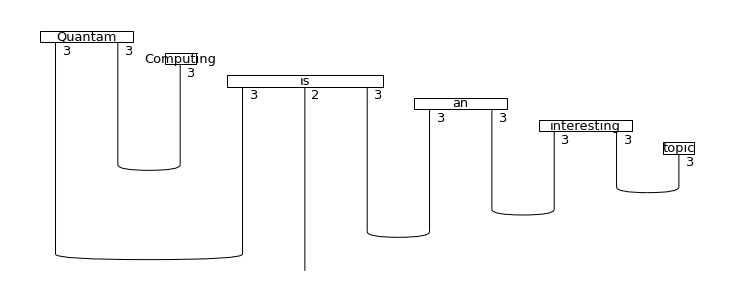

In [41]:
from lambeq import TensorAnsatz
from discopy import Dim

tensor_ansatz = TensorAnsatz({N: Dim(3), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)

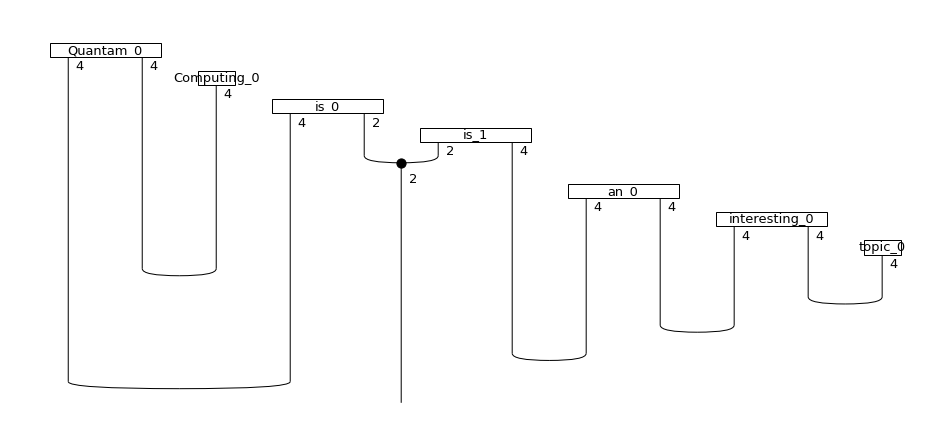

In [42]:
from lambeq import SpiderAnsatz
from discopy import Dim

spider_ansatz = SpiderAnsatz({N: Dim(4), S: Dim(2)})
spider_diagram = spider_ansatz(diagram)
spider_diagram.draw(figsize=(13,6), fontsize=13)

# Package versions<a name="packages"></a>

In [43]:
from platform import python_version
import pytket
import qiskit

print("python version: ", python_version())
print("pytket version: ", pytket.__version__)
print("qiskit version: ", qiskit.__version__)

python version:  3.9.12
pytket version:  1.1.0
qiskit version:  0.20.1


# Bibliography<a name="references"></a>

[1] [Discopy](https://github.com/oxford-quantum-group/discopy)

[2] [QNLP tutorial](https://discopy.readthedocs.io/en/main/notebooks/qnlp-tutorial.html)

[3] Clark. Something Old, Something New: Grammar-based CCG Parsing with Transformer Models, arXiv:2109.10044, 2021

<!--
# Things to install<a name="install"></a>

Nest lines seem needed.


```python
!pip install pytket-qiskit 
!pip install pytket 
!pip install qiskit 
!pip3 install pytket-pyzx
```
-->